### Задание №1  
1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.  
2. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.  
3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.  

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from nltk import WordNetLemmatizer

In [3]:
# Открываем файл
with open('harry.txt', 'r', encoding='utf-8') as f:
        text = f.read()

# Очищаем от пунктуации
text_clean = [w.strip("’!\"#$%&'()*+,./:;<=>?@[\]^_`{|}~„“”«»†*—/\-”.!,?—?,") for w in text.split()] 
text_clean = [w for w in text_clean if len(w) != 0] # очищаем от пустых элементов

# Приводим к нижнему регистру
text_clean = ' '.join(text_clean).lower()

In [4]:
text_clean[:200]

"chapter one the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you'd expect to be involved"

In [5]:
# Лемматизируем и записываем в новый файл
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
harry_lemmatized = wnl.lemmatize(' '.join((word_tokenize(text_clean))))

with open('harry_lemmatized.txt', 'w', encoding='utf-8') as f:
    f.write(harry_lemmatized)

In [6]:
# Считаем абсолютную частоту всех лемм
harry_freq = {}
counts = Counter(harry_lemmatized.split())

for k, v in counts.items():
    harry_freq[k] = v
    

In [7]:
# Сортируем по частоте
harry_sorted = sorted(harry_freq.items(), key=lambda x: x[1], reverse=True)
harry_sorted[:10]

[('the', 3603),
 ('and', 1870),
 ('to', 1845),
 ('he', 1714),
 ('a', 1667),
 ('harry', 1305),
 ('was', 1257),
 ('of', 1255),
 ('it', 1137),
 ("'s", 995)]

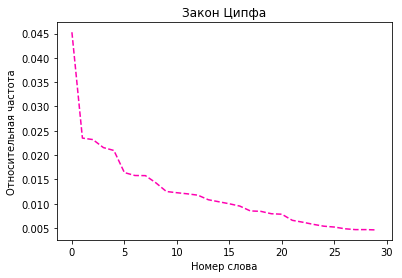

In [8]:
# Проверяем закон Ципфа
X = range(30)
Y = []
length = len(harry_lemmatized.split())

             
for word in harry_sorted:
    harry_abs_freq = word[1] # достаём абсолютную частоту из словаря
    harry_rel_freq = harry_abs_freq/length
    Y.append(harry_rel_freq)
             
plt.plot(X, Y[:30], c='xkcd:bright pink', linestyle='--')
plt.title('Закон Ципфа')
plt.xlabel('Номер слова')
plt.ylabel('Относительная частота')
plt.show()

3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [9]:
# Очищаем от стоп-слов
sw = stopwords.words('english')

harry_filtered = [w for w in word_tokenize(harry_lemmatized) if w not in sw]
print(harry_filtered[:20])

['chapter', 'one', 'boy', 'lived', 'mr', 'mrs', 'dursley', 'number', 'four', 'privet', 'drive', 'proud', 'say', 'perfectly', 'normal', 'thank', 'much', 'last', 'people', "'d"]


In [10]:
# Сортируем текст без стоп-слов
harry_nosw_freq = {}
counts = Counter(harry_filtered)

for k, v in counts.items():
    harry_nosw_freq[k] = v
    

harry_nosw_sorted = sorted(harry_nosw_freq.items(), key=lambda x: x[1], reverse=True)
harry_nosw_sorted[:30]

[('harry', 1305),
 ("'s", 995),
 ("n't", 828),
 ('said', 794),
 ('ron', 427),
 ('hagrid', 366),
 ('could', 301),
 ("'d", 267),
 ('hermione', 267),
 ('back', 257),
 ('one', 250),
 ('got', 204),
 ('get', 192),
 ('like', 188),
 ('know', 185),
 ('see', 177),
 ("'ve", 176),
 ('professor', 172),
 ('looked', 169),
 ('snape', 167),
 ("'ll", 160),
 ('dumbledore', 156),
 ('would', 153),
 ('around', 141),
 ('dudley', 137),
 ("'re", 135),
 ('going', 134),
 ('go', 130),
 ('something', 128),
 ('think', 121)]

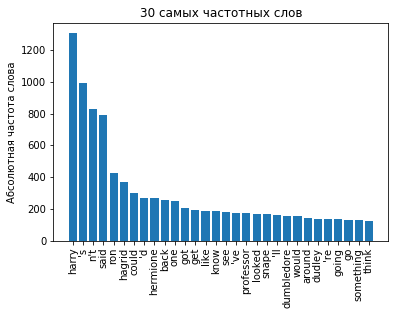

In [22]:
X2 = range(30)
Y2 = [word[1] for word in harry_nosw_sorted] # вынимаем из словаря число
Z2 = [word[0] for word in harry_nosw_sorted] # вынимаем слово для подписи делений


plt.bar(X2, Y2[:30])
plt.title('30 самых частотных слов')
plt.ylabel('Абсолютная частота слова')
plt.xticks(X, Z2[:30], rotation=90)
plt.show()
